In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

In [2]:
nbpres = pd.read_excel("TimeSeries/dataset.xlsx")
#nbpres = nbpres[: 30]
nbpres

,date,presence
0,2019-09-01,153
1,2019-09-02,151
2,2019-09-03,103
3,2019-09-04,87
4,2019-09-05,170
...,...,...
1075,2022-08-11,169
1076,2022-08-12,0
1077,2022-08-13,83
1078,2022-08-14,152


In [3]:
nbpres.drop(nbpres[nbpres.presence==0].index, inplace=True)

In [4]:
nbpres

,date,presence
0,2019-09-01,153
1,2019-09-02,151
2,2019-09-03,103
3,2019-09-04,87
4,2019-09-05,170
...,...,...
1074,2022-08-10,82
1075,2022-08-11,169
1077,2022-08-13,83
1078,2022-08-14,152


In [5]:
nbpres.describe()

,presence
count,818.000000
mean,138.353301
std,32.151319
min,79.000000
25%,105.000000
50%,150.000000
75%,153.000000
max,184.000000


<AxesSubplot:>

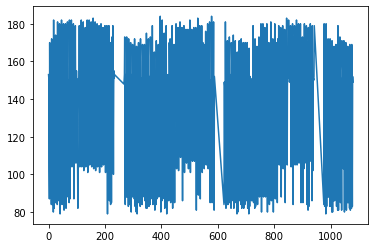

In [6]:
nbpres['presence'].plot()

In [7]:
nbpres['date'] = pd.to_datetime(nbpres['date'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = nbpres.set_index(['date'])

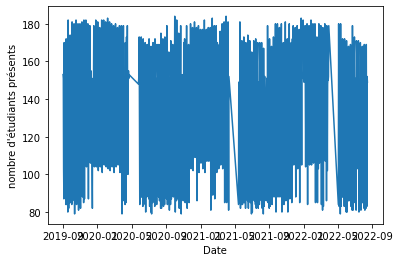

In [8]:
plt.xlabel('Date')
plt.ylabel("nombre d'étudiants présents")
plt.plot(indexedDataset.presence)

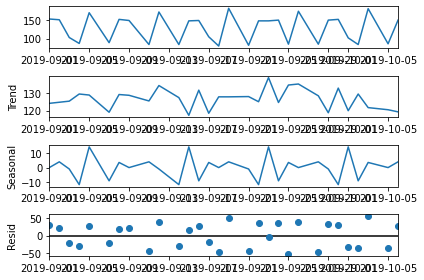

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(indexedDataset[:30], model="additive",extrapolate_trend='freq', period=7)
decompose_data.plot();

<AxesSubplot:xlabel='date', ylabel='saisonalité'>

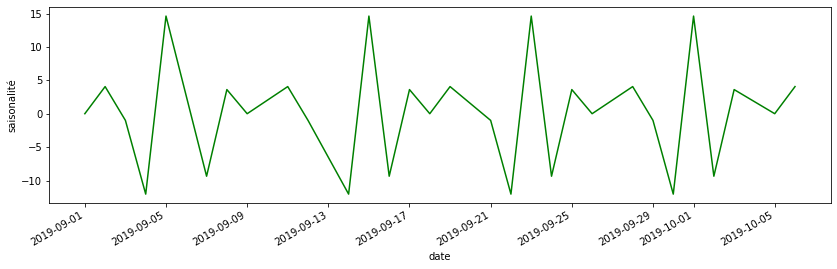

In [10]:
seasonality=decompose_data.seasonal
plt.xlabel('Date')
plt.ylabel("saisonalité")
seasonality.plot(color='green',figsize=(14,4))

In [11]:
from statsmodels.tsa.tsatools import detrend
notrend = detrend(nbpres['presence'])
nbpres["notrend"] = notrend
nbpres["trend"] = nbpres['presence'] - notrend
nbpres.tail()

,date,presence,notrend,trend
1074,2022-08-10,82,-53.355180,135.355180
1075,2022-08-11,169,33.652232,135.347768
1077,2022-08-13,83,-52.340356,135.340356
1078,2022-08-14,152,16.667055,135.332945
1079,2022-08-15,149,13.674467,135.325533


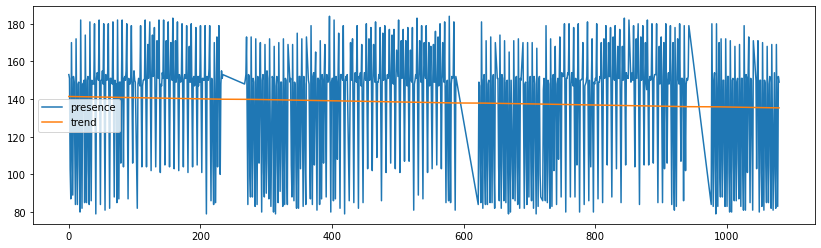

In [12]:
nbpres.plot(y=["presence", "trend"], figsize=(14,4));

In [13]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(indexedDataset.presence, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.452914428995365
2. P-Value :  0.1273549619603146
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 800
5. Critical Values :
	 1% :  -3.438550508267578
	 5% :  -2.8651595688281253
	 10% :  -2.5686973890625


In [14]:
rolmean = nbpres.rolling(window=7).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = nbpres.rolling(window=7).std()
print(rolmean,rolstd)

        presence    notrend       trend
0            NaN        NaN         NaN
1            NaN        NaN         NaN
2            NaN        NaN         NaN
3            NaN        NaN         NaN
4            NaN        NaN         NaN
...          ...        ...         ...
1074  110.285714 -25.091702  135.377416
1075  119.571429 -15.798576  135.370004
1077  119.714286 -15.648307  135.362592
1078  117.285714 -18.069466  135.355180
1079  127.000000  -8.347768  135.347768

[818 rows x 3 columns]        presence    notrend     trend
0           NaN        NaN       NaN
1           NaN        NaN       NaN
2           NaN        NaN       NaN
3           NaN        NaN       NaN
4           NaN        NaN       NaN
...         ...        ...       ...
1074  36.426704  36.425181  0.016012
1075  42.359010  42.362104  0.016012
1077  42.212614  42.208110  0.016012
1078  39.292554  39.296958  0.016012
1079  37.175261  37.178255  0.016012

[818 rows x 3 columns]


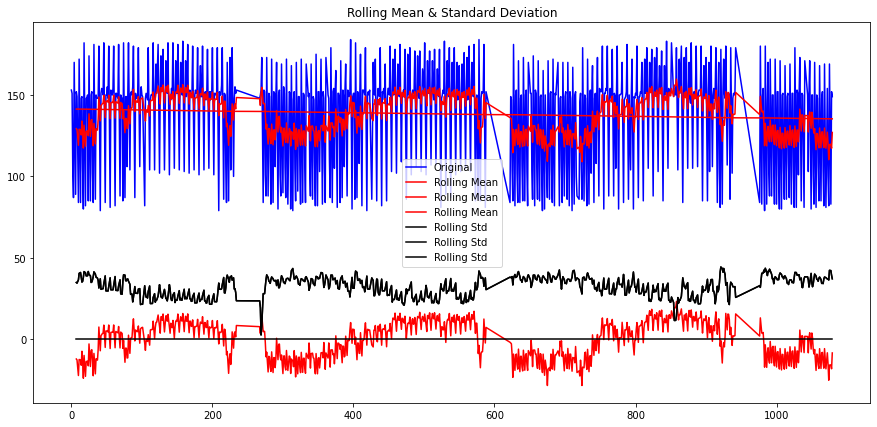

In [15]:
#Plot rolling statistics
plt.figure(figsize=(15,7))
orig = plt.plot(nbpres.presence, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

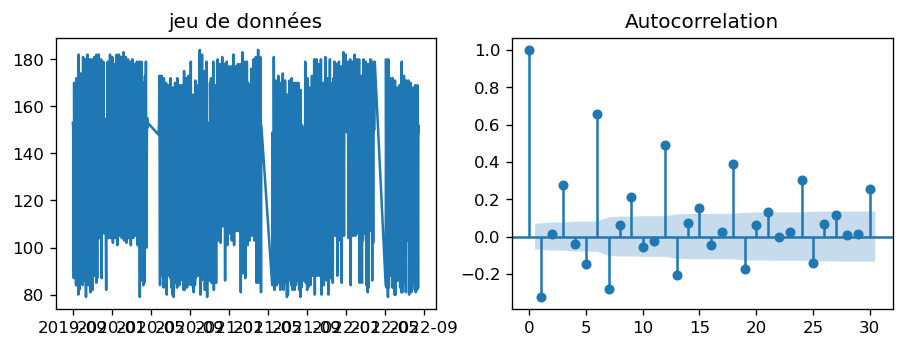

<Figure size 1080x360 with 0 Axes>

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(indexedDataset.presence); axes[0].set_title('jeu de données')
plot_acf(nbpres.presence, ax=axes[1])

plt.show()
plt.savefig("acf.png")

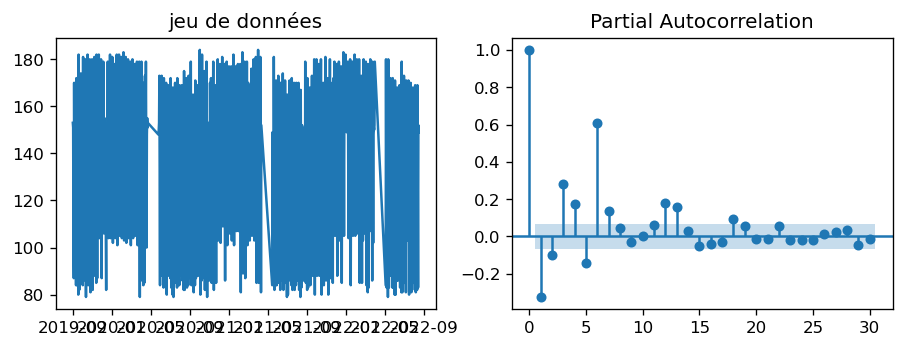

In [17]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(indexedDataset.presence); axes[0].set_title('jeu de données')
plot_pacf(indexedDataset.presence.dropna(), ax=axes[1])

plt.show()

In [18]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

NameError: name 'model_fit' is not defined

In [ ]:
train = indexedDataset.presence[:497]
test = indexedDataset.presence[497:]

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
model=ARIMA(indexedDataset['presence'],order=(7,0,1))
model_fit = model.fit(disp=0)

C:\Users\Laghoub\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Laghoub\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

In [ ]:
import time
ListAic = [[]]
for p in range(10):
    for q in range(8):
        model=ARIMA(nbpres['presence'],order=(p,0,q))
        start_time = time.perf_counter()
        model_fit = model.fit(disp=0)
        end_time = time.perf_counter()
        ListAic.append(["p="+str(p),"q="+str(q),"AIC="+ str(round(model_fit.aic,2)),"temps d'éxécution=" + str(round(end_time - start_time,5))])
        
        

In [ ]:
ListAic

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               presence   No. Observations:                  818
Model:                     ARMA(7, 1)   Log Likelihood               -3692.129
Method:                       css-mle   S.D. of innovations             22.028
Date:                Tue, 16 Aug 2022   AIC                           7404.258
Time:                        22:14:27   BIC                           7451.327
Sample:                             0   HQIC                          7422.321
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            136.3770      4.136     32.975      0.000     128.271     144.483
ar.L1.presence     0.5129      0.054      9.514      0.000       0.407       0.619
ar.L2.presence     0.1904      0.032      5.897      0.000       0.127       0.254
ar.L3.presence     0.1482      0.031      4.750      0.000       0.087       0.209
ar.L4.presence    -0.0308      0.032     -0.969      0.332      -0.093       0.032
ar.L5.presence    -0.0007      0.032     -0.021      0.983      -0.063       0.061
ar.L6.presence     0.5738      0.031     18.446      0.000       0.513       0.635
ar.L7.presence    -0.4172      0.046     -8.986      0.000      -0.508      -0.326
ma.L1.presence    -0.8682      0.038    -22.854      0.000      -0.943      -0.794
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0725           -0.0000j            1.0725           -0.5000
AR.2           -0.5592           -0.8921j            1.0529           -0.3391
AR.3           -0.5592           +0.8921j            1.0529            0.3391
AR.4            0.5317           -1.0262j            1.1557           -0.1739
AR.5            0.5317           +1.0262j            1.1557            0.1739
AR.6            1.0134           -0.0000j            1.0134           -0.0000
AR.7            1.4895           -0.0000j            1.4895           -0.0000
MA.1            1.1518           +0.0000j            1.1518            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='date'>

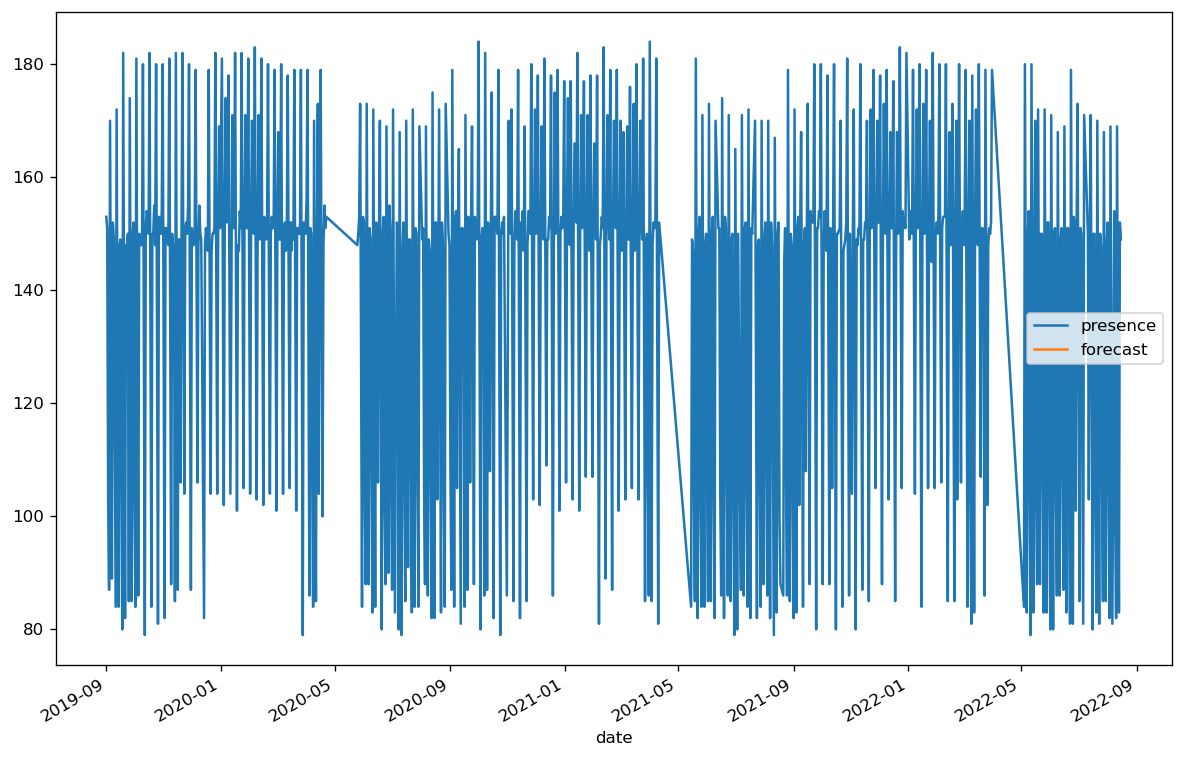

In [29]:
indexedDataset['forecast']=model_fit.predict(exog=None,dynamic=False)
indexedDataset[['presence','forecast']].plot(figsize=(12,8))

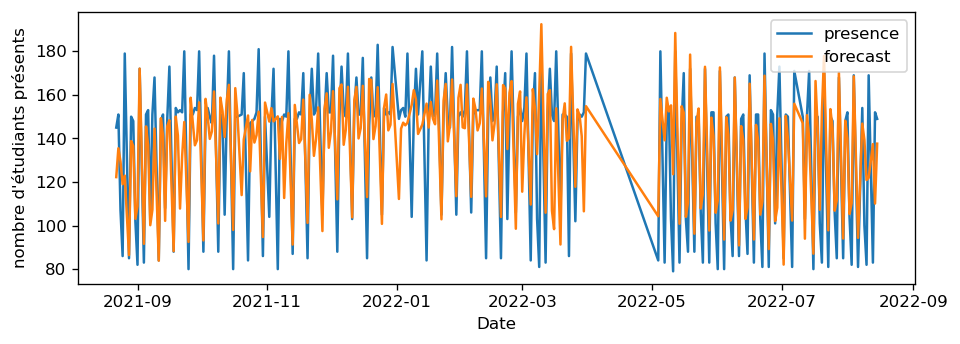

In [25]:
plt.xlabel('Date')
plt.ylabel("nombre d'étudiants présents")
plt.plot(indexedDataset[546:])
plt.legend(indexedDataset)

In [ ]:
indexedDataset[:545]

In [26]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(indexedDataset['presence'],order=(7, 0, 1),seasonal_order=(7,0,1,12))
results=model.fit()

<AxesSubplot:>

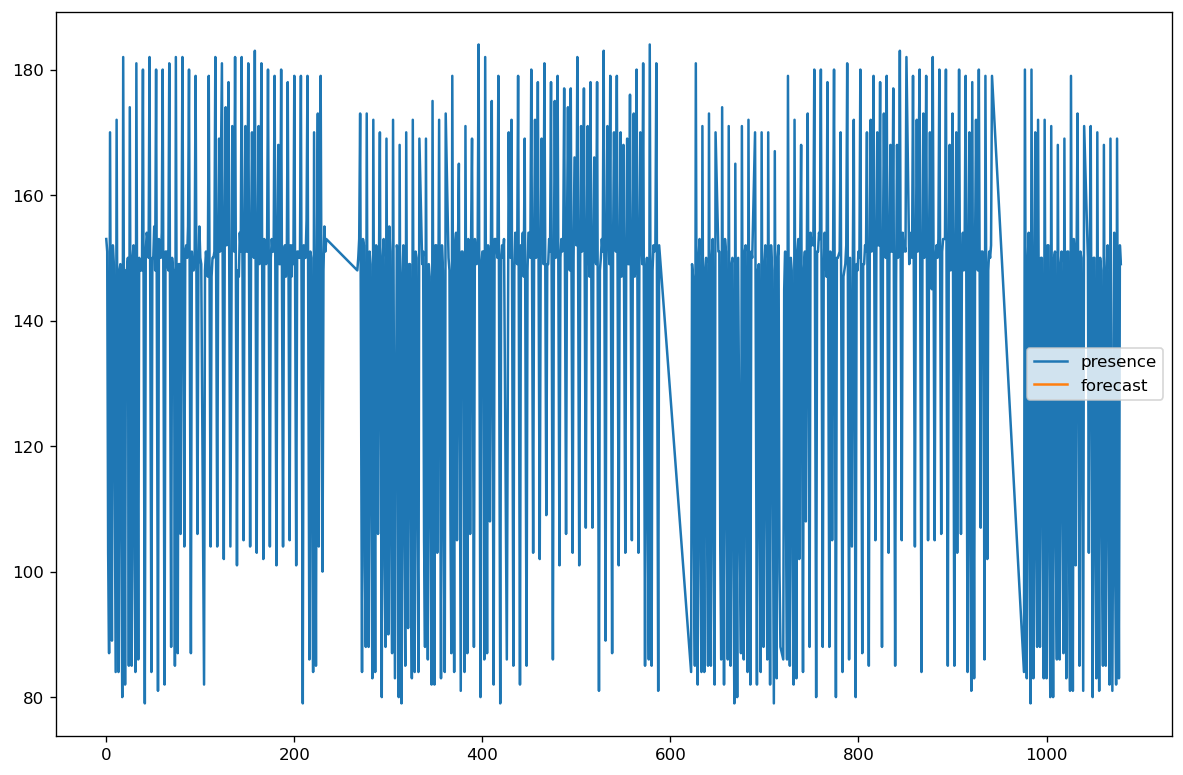

In [27]:
nbpres['forecast']=results.predict(exog=None,dynamic=False)
nbpres[['presence','forecast']].plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(nbpres.presence, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=15, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=1,
                      start_Q=1,
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

In [69]:
import time
start_time = time.perf_counter()
model=ARIMA(indexedDataset['presence'],order=(7,0,1))
model_fit = model.fit(disp=0)
end_time = time.perf_counter()
print("temps d'éxécution", end_time - start_time)

temps d'éxécution 2.107027099998959


temps d'éxécution 0.10298649999458576


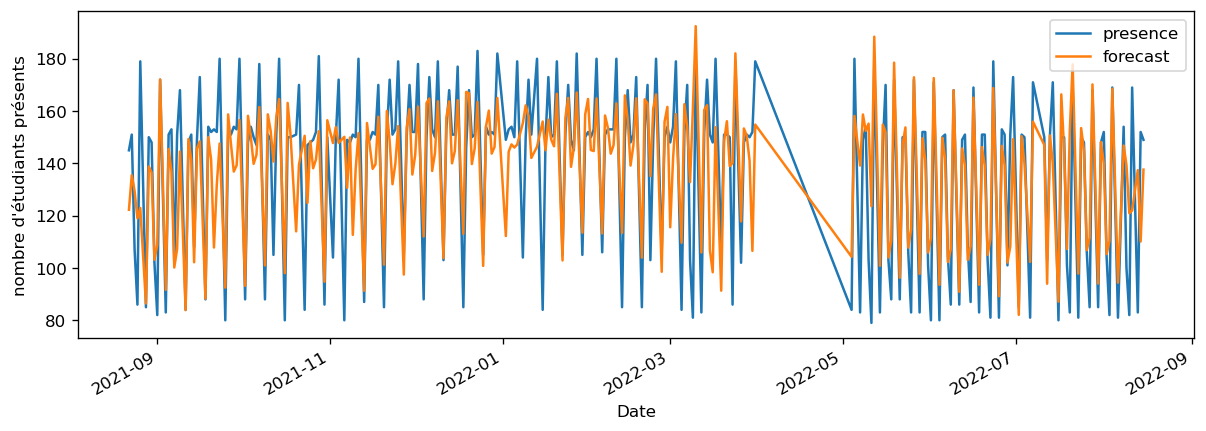

In [66]:
start_time = time.perf_counter()
indexedDataset['forecast']=model_fit.predict(exog=None,dynamic=False)
indexedDataset[['presence','forecast']][546:].plot(figsize=(12,4))
plt.xlabel('Date')
plt.ylabel("nombre d'étudiants présents")
end_time = time.perf_counter()
print("temps d'éxécution", end_time - start_time)

In [44]:
moy=0
for i in range (272):
    if (indexedDataset['forecast'][i]<indexedDataset['presence'][i]):
        moy = moy + (indexedDataset['forecast'][i]/ indexedDataset['presence'][i])
    else:
        moy = moy + (indexedDataset['presence'][i]/ indexedDataset['forecast'][i])
        
print(moy/272)
    
    

0.8919926197712315


In [67]:
indexedDataset['forecast'] = round(indexedDataset['forecast'])
indexedDataset[['presence','forecast']][546:]

,presence,forecast
date,,
2021-08-22,145,122.0
2021-08-23,151,135.0
2021-08-24,107,129.0
2021-08-25,86,119.0
2021-08-26,179,123.0
...,...,...
2022-08-10,82,121.0
2022-08-11,169,122.0
2022-08-13,83,137.0


In [81]:
import statsmodels.api as sm
start_time = time.perf_counter()
model=sm.tsa.statespace.SARIMAX(indexedDataset['presence'],order=(7, 0, 1),seasonal_order=(1,0,1,12))
results=model.fit()
end_time = time.perf_counter()
print("temps d'éxécution", end_time - start_time)

temps d'éxécution 5.693277400001534


In [ ]:
results.summary()

<AxesSubplot:xlabel='date'>

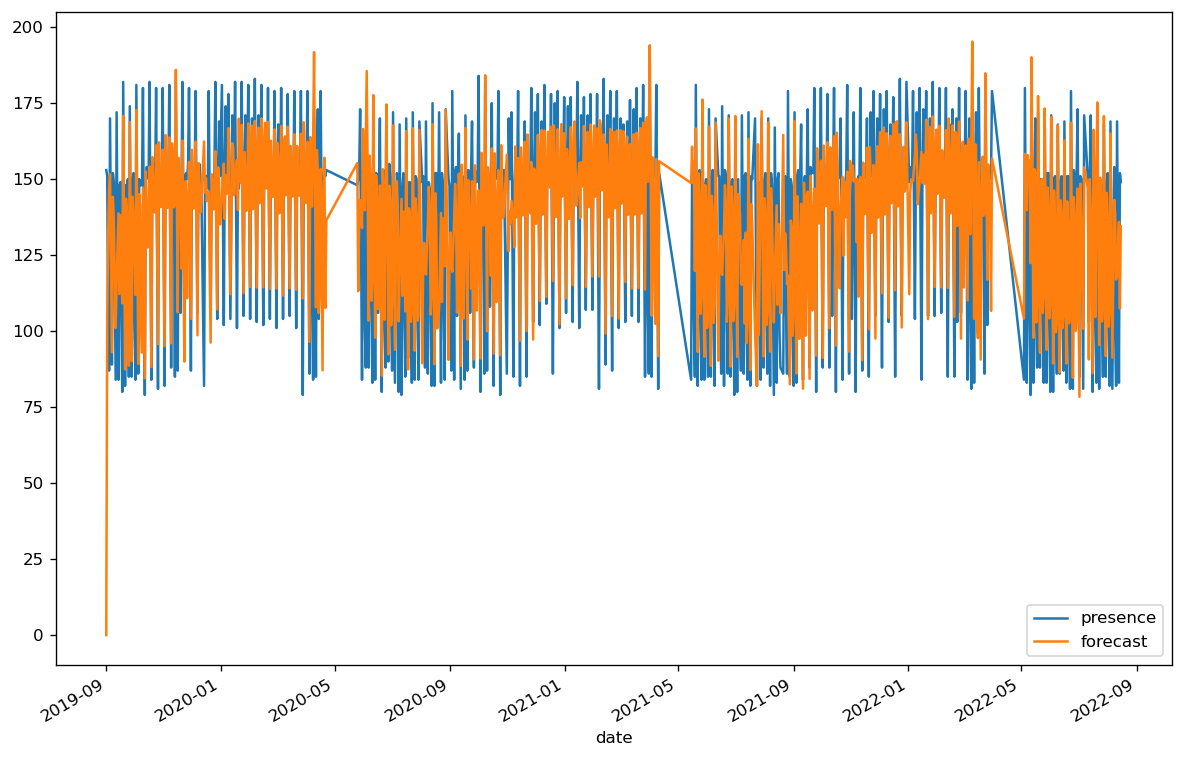

In [82]:
indexedDataset['forecast']=results.predict(exog=None,dynamic=False)
indexedDataset[['presence','forecast']].plot(figsize=(12,8))

In [83]:
indexedDataset=indexedDataset.drop(["score"],axis=1)

KeyError: "['score'] not found in axis"

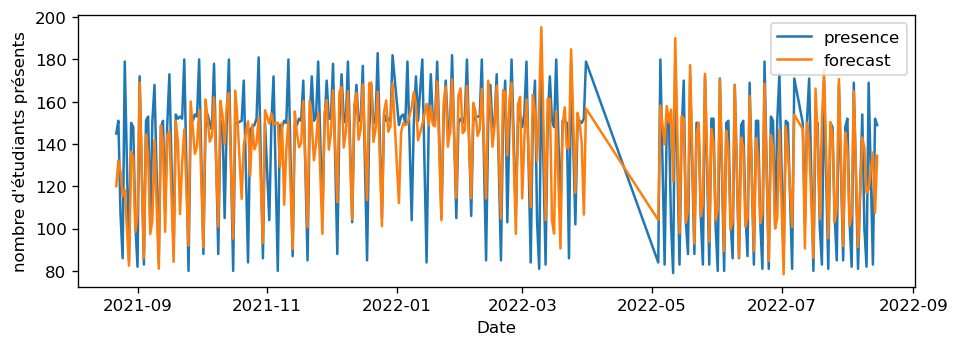

In [84]:
plt.xlabel('Date')
plt.ylabel("nombre d'étudiants présents")
plt.plot(indexedDataset[546:])
plt.legend(indexedDataset)

In [73]:
indexedDataset["forecast"] = round(indexedDataset["forecast"])

In [77]:
indexedDataset[546:].to_excel("Sarima.xlsx")

In [63]:
moy=0
for i in range (272):
    if (indexedDataset['forecast'][i]<indexedDataset['presence'][i]):
        moy = moy + (indexedDataset['forecast'][i]/ indexedDataset['presence'][i])
    else:
        moy = moy + (indexedDataset['presence'][i]/ indexedDataset['forecast'][i])
        
print(moy/272)
    

0.8885446862762353


In [ ]:
nbpres['forecast'][545:]

In [ ]:
nbpres['date'][545:]

In [ ]:
train = indexedDataset.presence[:545]
test = indexedDataset.presence[545:]

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train,order=(7, 0, 1),seasonal_order=(7,0,1,12))
results=model.fit()

In [79]:
dataS = pd.read_excel("../Rapport/Resultats/Sarima.xlsx")
dataS

,date,presence,forecast
0,2021-08-22,145,120
1,2021-08-23,151,132
2,2021-08-24,107,127
3,2021-08-25,86,115
4,2021-08-26,179,118
...,...,...,...
267,2022-08-10,82,117
268,2022-08-11,169,118
269,2022-08-13,83,136
270,2022-08-14,152,107


<AxesSubplot:>

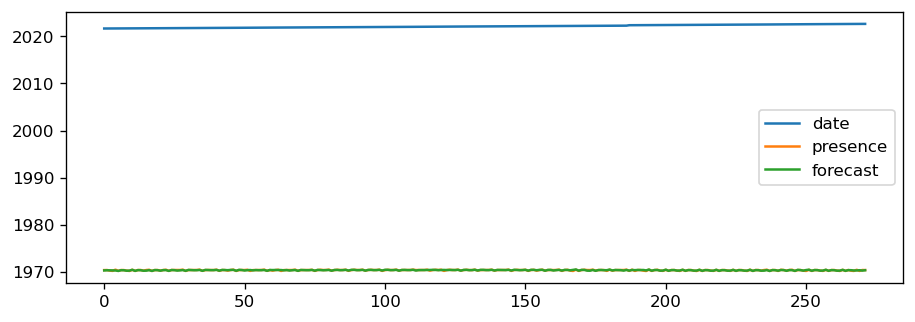

In [80]:
dataS.plot()